# Activity: Evaluate simple linear regression

## Introduction

In this activity, you will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, you will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.

## Step 1: Imports

### Import packages

Import relevant Python libraries and packages. In this activity, you will need to use `pandas`, `pyplot` from `matplotlib`, and `seaborn`.

In [ ]:
# Import pandas, pyplot from matplotlib, and seaborn.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import the statsmodel module and the ols function

Import the `statsmodels.api` Python module using its common abbreviation, `sm`, along with the `ols()` function from `statsmodels.formula.api`. To complete this, you will need to write the imports as well.

In [ ]:
# Import the statsmodel module.

from statsmodels.formula.api import ols
import statsmodels.api as sm


### Load the dataset

`Pandas` was used to load the provided dataset `marketing_and_sales_data_evaluate_lr.csv` as `data`, now display the first five rows. This is a fictional dataset that was created for educational purposes. The variables in the dataset have been kept as is to suit the objectives of this activity. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, you'll construct a simple linear regression model that predicts sales using a single independent variable.

**Question:** What are some reasons for conducting an EDA before constructing a simple linear regression model?

1. Understand Variable Relationships
2. Detect Outliers
3. Check for Linearity
4. Assess Distribution of Variables


### Explore the data size

Calculate the number of rows and columns in the data.

In [ ]:
# Display the shape of the data as a tuple (rows, columns).

data.shape

(4572, 4)

### Explore the independent variables

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, use `describe()` to generate descriptive statistics for these three variables.

In [ ]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

data[['TV', 'Radio', 'Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


### Explore the dependent variable

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [ ]:
# Calculate the average missing rate in the sales column.
missing_sales = data['Sales'].isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.
missing_sales_percent = round(missing_sales * 100, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).

print("Missing Sales: " + str(missing_sales_percent) + "%")



Missing Sales: 0.13%


**Question:** What do you observe about the percentage of missing values in the `Sales` column?

Missing Sales are 0.13%

### Remove the missing data

Remove all rows in the data from which `Sales` is missing.

In [ ]:
# Subset the data to include rows where Sales is present.

data_no_missing_sales = data.dropna(subset=['Sales'])


### Visualize the sales distribution

Create a histogram to visualize the distribution of `Sales`.

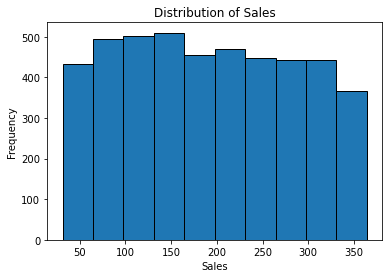

In [ ]:
# Create a histogram of the Sales
plt.hist(data_no_missing_sales['Sales'], bins=10, edgecolor='black')

# Add a title
plt.title('Distribution of Sales')

# Add labels (opcional pero recomendable)
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Show the plot
plt.show()


**Question:** What do you observe about the distribution of `Sales` from the preceding histogram?

Roughly Uniform Distribution, No Strong Skewness, No outliers

## Step 3: Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help you select the X variable for the simple linear regression.

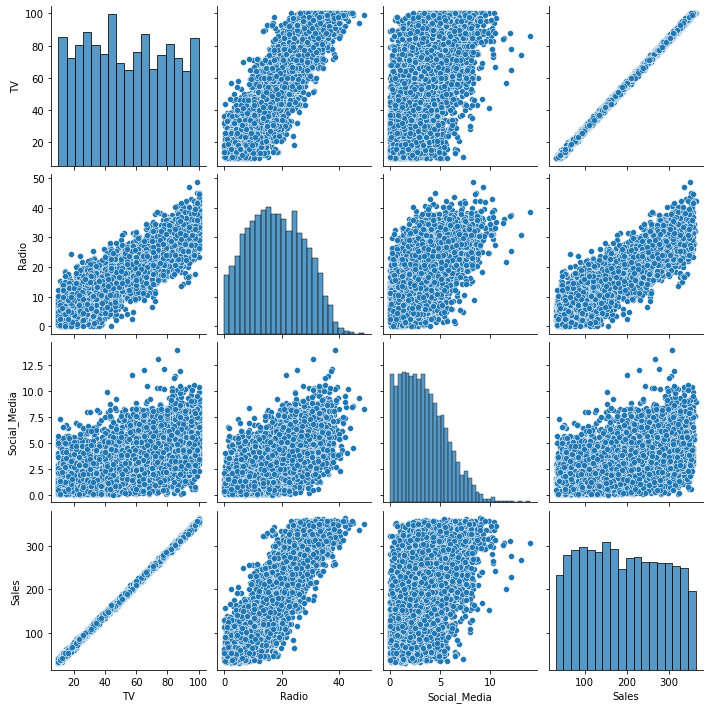

In [ ]:
# Create a pairplot of the data.

sns.pairplot(data_no_missing_sales)

**Question:** Which variable did you select for X? Why?

The scatterplot between TV and Sales shows a strong positive linear relationship.


### Build and fit the model

Replace the comment with the correct code. Use the variable you chose for `X` for building the model.

In [ ]:
# Define the OLS formula.

ols_formula = "Sales ~ TV"

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data_no_missing_sales)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_summary = model.summary()

# Display the model results.

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:26:45   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable.

Create a scatterplot comparing the X variable you selected with the dependent variable.

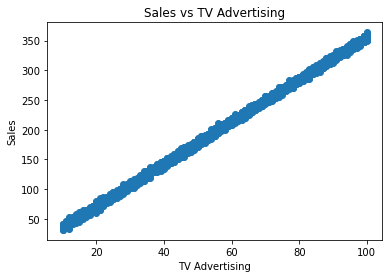

In [ ]:
# Create a scatterplot comparing X and Sales (Y).

# Create a scatterplot comparing TV and Sales
plt.scatter(data_no_missing_sales['TV'], data_no_missing_sales['Sales'])

# Add title and labels
plt.title('Sales vs TV Advertising')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')

# Show the plot
plt.show()

**QUESTION:** Is the linearity assumption met?

The data points form a tight, straight diagonal line, indicating a very strong linear relationship between TV (X) and Sales (Y).

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

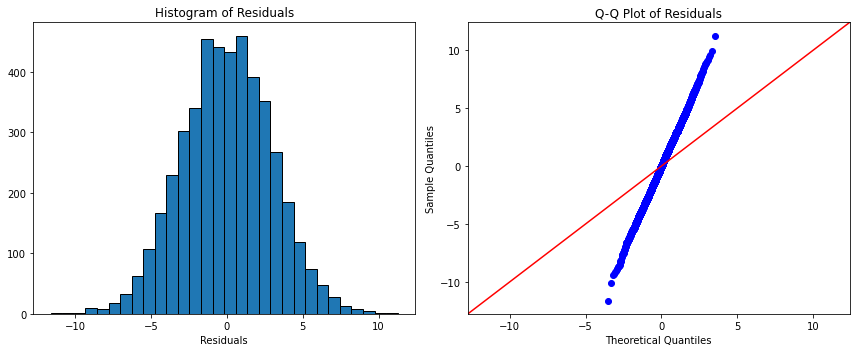

In [ ]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figures.

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(residuals, bins=30, edgecolor='black')

# Set the x label of the residual plot.
axes[0].set_xlabel("Residuals")


# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='45', ax=axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Q-Q Plot of Residuals")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()


**Question:** Is the normality assumption met?

Yes, the normality assumption is well met based on both plots.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

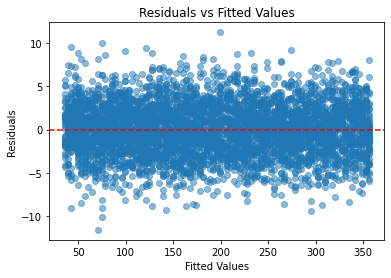

In [ ]:
# Create a scatterplot with the fitted values from the model and the residuals.
plt.scatter(model.fittedvalues, model.resid, alpha=0.5)

# Set the x-axis label.
plt.xlabel("Fitted Values")

# Set the y-axis label.
plt.ylabel("Residuals")

# Set the title.
plt.title("Residuals vs Fitted Values")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(y=0, color='red', linestyle='--')

# Show the plot.
plt.show()


**QUESTION:** Is the homoscedasticity assumption met?

Yes, the homoscedasticity assumption is met, as the residuals are evenly scattered around zero with no clear pattern or funnel shape.

## Step 4: Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [ ]:
# Display the model_results defined previously.

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:42:36   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

**Question:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?


The model's R-squared of 0.999 indicates that 99.9% of the variation in Sales is explained by TV advertising, suggesting an exceptionally strong linear relationship.

### Interpret the model results

With the model fit evaluated, assess the coefficient estimates and the uncertainty of these estimates.

**Question:** Based on the preceding model results, what do you observe about the coefficients?

The coefficient for TV is 3.5614 and statistically significant, indicating a strong positive impact on Sales, while the intercept is not significa

**Question:** How would you write the relationship between X and `Sales` in the form of a linear equation?

 The linear equation is: Sales = -0.1263 + 3.5614 * TV.

**Question:** Why is it important to interpret the beta coefficients?

 Interpreting beta coefficients is important because they quantify the effect of each independent variable on the dependent variable, helping us understand and predict outcomes.

### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.

In [ ]:
# Display the model_results defined previously.

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:46:37   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

**Question:** Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

The p-value for the coefficient of TV is 0.000, which means the relationship between TV and Sales is statistically significant at any common significance level (e.g., 0.05).
The 95% confidence interval for the TV coefficient is [3.558, 3.565], indicating that we are 95% confident the true effect of TV on Sales lies within this very narrow and positive range — further reinforcing the strength and precision of the estimate.

**Question:** Based on this model, what are you interested in exploring?

Based on this model, I would be interested in exploring whether adding other predictors like Radio or Social_Media improves the model’s performance and whether interaction or nonlinear effects exist that might better explain the variation in Sales.

**Question:** What recommendations would you make to the leadership at your organization?

Based on the model results, I would recommend that leadership increase investment in TV advertising, as it has a strong, statistically significant, and highly predictive relationship with Sales. Additionally, I suggest exploring the potential impact of other channels like Radio and Social Media through multivariable analysis to optimize the overall marketing strategy.

## Considerations

**What are some key takeaways that you learned from this lab?**

* Exploratory analysis helps choose the best variable for simple linear regression.
* It's important to check that the data meets the model’s assumptions before trusting the results.
* R-squared tells us how well the model predicts the outcome.
* Coefficients should always come with measures of uncertainty, like p-values and confidence intervals.


**What findings would you share with others?**

* Sales are spread fairly evenly between $25 and $350 million.
* TV advertising shows the strongest relationship with sales.
* Radio has a moderate link with sales, but more variation.
* Social media has a weak relationship with sales.
* Using TV as the predictor, the model has an R-squared of 0.999, meaning it explains 99.9% of the sales variation.
* The regression model gives a TV coefficient of 3.5614 and an intercept of -0.1263.
* The p-value is very low (0.000), and the confidence interval is tight: [3.558, 3.565], showing strong evidence.

**How would you frame your findings to stakeholders?**

* TV ads have the strongest and most reliable connection to sales, compared to radio or social media.
* The model shows that almost all sales variation can be explained by TV budget alone.
* For every $1 million added to the TV ad budget, sales are expected to go up by about $3.56 million.
* We are 95% confident that the true increase in sales lies between $3.558M and $3.565M, making this a very solid and trustworthy estimate.



#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

Dale, D.,Droettboom, M., Firing, E., Hunter, J. (n.d.). [*Matplotlib.Pyplot.Axline — Matplotlib 3.5.0 Documentation*](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axline.html).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.